Get the actual solar elongation from JPL Horizons

In [29]:
%matplotlib notebook

In [31]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.time import Time

from astroquery.jplhorizons import Horizons
from sbpy.data import Names

In [2]:
import sys
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves")
from calculate_phase import solar_apparitions as sa

In [3]:
mjd_jd = 2400000.5 # conversion from MJD to JD

In [4]:
# obj_id = 2212
# obj_id = "Ryugu" # more complicated NEA (Apollo asteroid)
# obj_id = "Bennu" # NEA with pole info in JPL
obj_id = "1998 OH"
loc = "T05"

In [5]:
# t1=Time(57938,format="mjd")
# t2=Time(59379,format="mjd")
t1=Time(56938,format="mjd")
t2=Time(60379,format="mjd")

In [6]:
print(t1.jd,t2.jd)

2456938.5 2460379.5


In [7]:
# epoch_list = {'start':t1.iso, 'stop':t2.iso, 'step':'1d'} # a range of epochs in Horizons format is FAST!
epoch_list = {'start':t1.iso, 'stop':t2.iso, 'step':'5d'} # a range of epochs in Horizons format is FAST!

In [8]:
obj = Horizons(id=obj_id, location=loc, epochs=epoch_list)

In [9]:
eph = obj.ephemerides()

In [10]:
eph

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str15,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,int64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12538 (1998 OH),2014-Oct-08 00:00,2456938.5,15.92,0.15,*,,35.24274,24.99079,35.46183,25.05823,-38.7762,-36.1054,6.086865,-43.993989,813.32,88.98,-565969.38,110980.199,314.814,14.6861609261,999.0,--,18.466,4.774,98.60913,2.9e-05,545186.0,*,0.002075,--,--,--,--,51.19,0.0,--,--,28.3872,5.5831,2.039239538907,-4.4620707,1.10478577095999,-14.3971102,9.18822308,17.1617963,18.6110158,151.4406,/L,13.5505,33.9,99.74,15.0112,231.116,274.702,-9.61713,Ari,67.18237,41.4067692,10.3455095,--,--,147.414108,-33.586885,13.7877596562,0.000355,0.021,0.016,0.021,0.016,5.63,0.0010655,0.026,9.6695,9e-07,0.03,0.11,6.5e-05,204.7479,-11.67796115,13.5459,34.7519,8.0138
12538 (1998 OH),2014-Oct-09 00:00,2456939.5,15.92,0.15,*,,34.93911,24.7452,35.15782,24.81296,-40.033,-37.3271,7.743507,-44.092142,811.96,113.22,-569940.42,111468.503,315.396,14.7518682331,999.0,--,18.427,4.752,98.72067,2.7e-05,549797.5,*,0.002091,--,--,--,--,50.29,0.0,--,--,28.6345,5.4739,2.036649232055,-4.5075171,1.09660771891724,-13.9963042,9.1202083,17.1940024,18.4973517,152.7215,/L,12.9936,21.0,99.5689,14.287,230.214,274.535,-9.346,Ari,67.182372,41.0600657,10.2048916,--,--,147.230849,-33.92295,13.7924564218,0.000355,0.021,0.016,0.021,0.016,6.288,0.0010815,0.027,9.6036,9e-07,0.03,0.11,6.4e-05,205.0171,-11.591986737,12.989,34.7047,7.8837
12538 (1998 OH),2014-Oct-10 00:00,2456940.5,15.92,0.15,*,,34.62692,24.49134,34.84526,24.55941,-41.259,-38.5503,9.421562,-44.161475,809.89,137.67,-573918.81,111922.219,316.044,14.8175762383,999.0,--,18.387,4.729,98.82942,2.5e-05,554436.7,*,0.002106,--,--,--,--,49.32,0.0,--,--,28.8823,5.3642,2.03403267528,-4.5529801,1.08866896101021,-13.5863003,9.05418366,17.2265569,18.3845865,154.0102,/L,12.427,12.7,96.8039,13.5649,229.239,274.372,-9.0662,Ari,67.182373,40.7025813,10.059626,--,--,147.039994,-34.269322,13.7970300717,0.000355,0.021,0.017,0.021,0.016,6.933,0.0010972,0.027,9.5401,9e-07,0.03,0.11,6.4e-05,205.2871,-11.505440945,12.4223,34.6523,7.7513
12538 (1998 OH),2014-Oct-11 00:00,2456941.5,15.92,0.15,*,,34.30646,24.2292,34.52443,24.29759,-42.4509,-39.7726,11.119076,-44.200992,807.08,162.29,-577903.62,112341.004,316.772,14.8832850422,999.0,--,18.347,4.706,98.93505,2.3e-05,559100.4,

In [11]:
df_eph = eph.to_pandas()

In [12]:
list(df_eph)

['targetname',
 'datetime_str',
 'datetime_jd',
 'H',
 'G',
 'solar_presence',
 'flags',
 'RA',
 'DEC',
 'RA_app',
 'DEC_app',
 'RA_rate',
 'DEC_rate',
 'AZ',
 'EL',
 'AZ_rate',
 'EL_rate',
 'sat_X',
 'sat_Y',
 'sat_PANG',
 'siderealtime',
 'airmass',
 'magextinct',
 'V',
 'surfbright',
 'illumination',
 'illum_defect',
 'sat_sep',
 'sat_vis',
 'ang_width',
 'PDObsLon',
 'PDObsLat',
 'PDSunLon',
 'PDSunLat',
 'SubSol_ang',
 'SubSol_dist',
 'NPole_ang',
 'NPole_dist',
 'EclLon',
 'EclLat',
 'r',
 'r_rate',
 'delta',
 'delta_rate',
 'lighttime',
 'vel_sun',
 'vel_obs',
 'elong',
 'elongFlag',
 'alpha',
 'lunar_elong',
 'lunar_illum',
 'sat_alpha',
 'sunTargetPA',
 'velocityPA',
 'OrbPlaneAng',
 'constellation',
 'TDB-UT',
 'ObsEclLon',
 'ObsEclLat',
 'NPole_RA',
 'NPole_DEC',
 'GlxLon',
 'GlxLat',
 'solartime',
 'earth_lighttime',
 'RA_3sigma',
 'DEC_3sigma',
 'SMAA_3sigma',
 'SMIA_3sigma',
 'Theta_3sigma',
 'Area_3sigma',
 'RSS_3sigma',
 'r_3sigma',
 'r_rate_3sigma',
 'SBand_3sigma',
 '

In [13]:
df_eph["mjd"] = df_eph["datetime_jd"] - mjd_jd

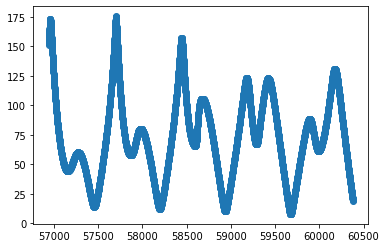

In [14]:
plt.scatter(df_eph["mjd"],df_eph["elong"])

In [15]:
# test JPL leading/trailing

In [16]:
df_eph["elongFlag"].value_counts()

/T    1978
/L    1464
Name: elongFlag, dtype: int64

In [17]:
df_eph["NPole_ang"]

0       <NA>
1       <NA>
2       <NA>
3       <NA>
4       <NA>
        ... 
3437    <NA>
3438    <NA>
3439    <NA>
3440    <NA>
3441    <NA>
Name: NPole_ang, Length: 3442, dtype: Int64

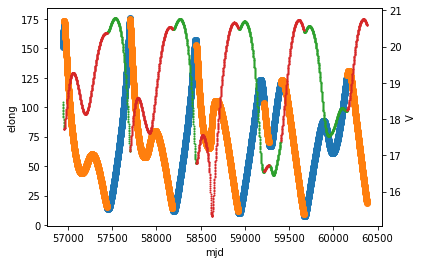

In [26]:
x_plot = "mjd"
y_plot = "elong"
df_plot1 = df_eph[df_eph["elongFlag"]=="/L"]
df_plot2 = df_eph[df_eph["elongFlag"]=="/T"]

# y_plot2 = "alpha_true"
# y_plot2 = "NPole_ang"
y_plot2 = "V"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])
ax2 = ax1.twinx()

ax1.scatter(df_plot1[x_plot],df_plot1[y_plot])
ax1.scatter(df_plot2[x_plot],df_plot2[y_plot])

ax2.scatter(df_plot1[x_plot],df_plot1[y_plot2],c = "C2", s=1)
ax2.scatter(df_plot2[x_plot],df_plot2[y_plot2],c = "C3", s=1)


ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)
ax2.set_ylabel(y_plot2)

plt.show()

In [19]:
obj = Horizons(id=obj_id)
el = obj.elements()
df_el = el.to_pandas()
df_el

,targetname,datetime_jd,datetime_str,H,G,e,q,incl,Omega,w,Tp_jd,n,M,nu,a,Q,P
0,12538 (1998 OH),2.459720e+06,A.D. 2022-May-20 16:05:13.4447,15.92,0.15,0.406142,0.915511,24.5354,220.696989,321.78026,2.459985e+06,0.514911,223.714405,200.800163,1.541633,2.167755,699.149287


In [20]:
name_parse = Names.parse_asteroid(df_el.iloc[0]["targetname"])
name_parse

{'number': 12538, 'desig': '1998 OH'}

In [21]:
try:
    name = name_parse["name"]
except:
    name = False
    
try:
    number = name_parse["number"]
except:
    number = False

In [22]:
df_data = df_eph[["mjd","elong"]].copy().rename(columns = {"elong":"sun_obs_target_angle"})
df_data["reduced_mag"] = 999
df_data["merr"] = 999
df_data

,mjd,sun_obs_target_angle,reduced_mag,merr
0,56938.0,151.4406,999,999
1,56939.0,152.7215,999,999
2,56940.0,154.0102,999,999
3,56941.0,155.3057,999,999
4,56942.0,156.6068,999,999
...,...,...,...,...
3437,60375.0,21.2909,999,999
3438,60376.0,20.7695,999,999
3439,60377.0,20.2498,999,999
3440,60378.0,19.7318,999,999


In [23]:
# Find the solar apparitions from elongation
# USE ALL DATA IN BOTH FILTERS?
orbital_period_yrs = df_el.iloc[0]["a"]**1.5
sol = sa.solar_apparitions(mpc_number = number, name = name, df_data = df_data)
# epochs = sol.solar_elongation(-1.0,period = orbital_period_yrs)
epochs = sol.solar_elongation_JPL(JPL_step="7d")

print(epochs)
N_app = len(epochs)-1 # number of apparitions detected in both filters
print(N_app)

use passed df_data
999.0
999.0
query Horizons
[56938. 57155. 57456. 57869. 58198. 58590. 58933. 59290. 59675. 59990.
 60379.]
10


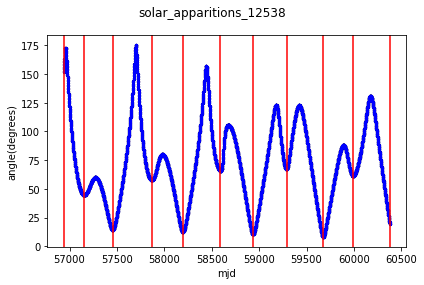

In [24]:
sol.plot_solar_elongation(epochs)

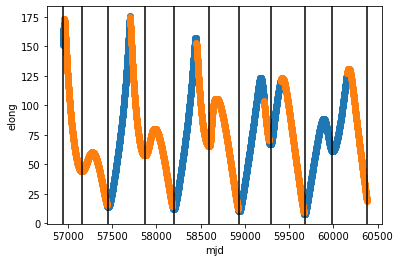

In [32]:
x_plot = "mjd"
y_plot = "elong"
df_plot1 = df_eph[df_eph["elongFlag"]=="/L"]
df_plot2 = df_eph[df_eph["elongFlag"]=="/T"]


fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])


ax1.scatter(df_plot1[x_plot],df_plot1[y_plot])
ax1.scatter(df_plot2[x_plot],df_plot2[y_plot])

for x in epochs:
    ax1.axvline(x,c="k")
    
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)
ax2.set_ylabel(y_plot2)

plt.show()